In [185]:
# python notebook for Make Your Own Neural Network
# code for a 3-layer neural network, and code for learning the MNIST dataset
# (c) Tariq Rashid, 2016
# license is GPLv2

In [186]:
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special
# library for plotting arrays
import matplotlib.pyplot
# ensure the plots are inside this notebook, not an external window
%matplotlib inline

In [187]:
# neural network class definition
class neuralNetwork:

    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        print("Error ", output_errors)
        
        pass

    
    # query the neural network
    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        return final_outputs

In [188]:
# number of input, hidden and output nodes
input_nodes = 1568
hidden_nodes = 1568
output_nodes = 1568

learning_rate = 0.1
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [189]:
# load the mnist training data CSV file into a list
training_data_file = open("mnist_dataset.md/mnist_test_10.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

#Numeros arbitrarios (no existe el 6, 8, 3)
inputDecena = 2
inputUnidad = 1

if (inputUnidad + 1 >= 10):
    targetUnidad = 0
    targetDecena = inputDecena + 1
    if (targetDecena >= 10):
        targetDecena = 0

else:
    targetUnidad = inputUnidad + 1
    targetDecena = inputDecena

#0--> inputDecena
#1--> inputUnidad
#2--> targetDecena
#3--> targetUnidad
banderas = [0,0,0,0]
contador = 0    

lInputDecena = []
lInputUnidad = []
lTargetDecena = []
lTargetUnidad = []

largo = len(training_data_list)

while ((banderas[0]!= 1 or  banderas[1] != 1 or  banderas[2] != 1 or  banderas[3] != 1) and contador != largo ):
    if (int(training_data_list[contador][0]) == inputDecena):
        lInputDecena = training_data_list[contador]
        banderas[0] = 1
        
    if (int(training_data_list[contador][0]) == inputUnidad):
        lInputUnidad = training_data_list[contador]
        banderas[1] = 1 
        
    if (int(training_data_list[contador][0]) == targetDecena):
        lTargetDecena = training_data_list[contador]
        banderas[2] = 1
        
    if (int(training_data_list[contador][0]) == targetUnidad):
        lTargetUnidad = training_data_list[contador]
        banderas[3] = 1
    contador += 1



In [190]:
# train the neural network

# epochs is the number of times the training data set is used for training
epochs = 1

record = lInputDecena[2:] + "," + lInputUnidad[2:]
preTargets = lTargetDecena[2:] + "," + lTargetUnidad[2:]
inputs = []
targets = []
for e in range(epochs):

    all_values = record.split(',')
    # scale and shift the inputs
    inputs = ( numpy.asfarray(all_values) / 255.0 * 0.99) + 0.01
    # inputs = (numpy.asfarray(all_values[0:3]) / 255.0 * 0.99) + 0.01
    target_values = preTargets.split(',')
    targets = (numpy.asfarray(target_values) / 255.0 * 0.99) + 0.01
    n.train(inputs, targets)
    pass

Error  [[-0.40067526]
 [-0.37743788]
 [-0.5100196 ]
 ..., 
 [-0.46911911]
 [-0.65854348]
 [-0.62895893]]


In [191]:
# load the mnist test data CSV file into a list
test_data_file = open("mnist_dataset.md/contador.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

Inputs:  [ 0.01  0.01  0.01 ...,  0.01  0.01  0.01]
Outputs:  [[ 0.01689232]
 [ 0.02736999]
 [ 0.00689506]
 ..., 
 [ 0.01332419]
 [ 0.00699234]
 [ 0.00877179]]


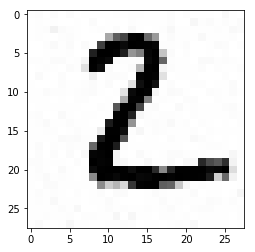

In [192]:
# test the neural network

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
# split the record by the ',' commas
all_values = record.split(',')
# correct answer is first value
correct_label = int(lInputDecena[0])
# scale and shift the inputs
inputs = (numpy.asfarray(all_values) / 255.0 * 0.99) + 0.01
# query the network
outputs = n.query(inputs)
print ("Inputs: ", inputs)
print("Outputs: ", outputs)
# the index of the highest value corresponds to the label
label = numpy.argmax(outputs)
# append correct or incorrect to list
if (label == correct_label):
    # network's answer matches correct answer, add 1 to scorecard
    scorecard.append(1)
else:
    # network's answer doesn't match correct answer, add 0 to scorecard
    scorecard.append(0)
    pass

image_array = numpy.asfarray(outputs[:len(outputs)//2]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

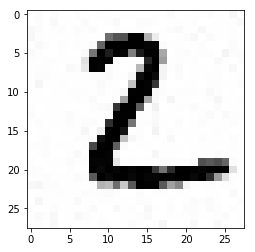

In [193]:
image_array = numpy.asfarray(outputs[len(outputs)//2:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [194]:
# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.0
